<a href="https://colab.research.google.com/github/parkrye/Python/blob/main/2022_MLStudy/Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning - Lab Session 2

This material is for educational uses only. Some contents are based on the material provided by other paper/book authors and may be copyrighted by them. 

**Note**: certain details are missing or ambiguous on purpose, in order to test your knowledge on the related materials. However, if you really feel that something essential is missing and cannot proceed to the next step, then contact the teaching staff with clear description of your problem.

### Submitting your work:
- <font color=red>**DO NOT clear the final outputs**</font> so that TAs can grade both your code and results.
- Commit the `.ipynb` file on your github repository and submit URL on E-Ruri

## Load `diabetes` dataset for Linear Regression

In [ ]:
import numpy as np
from sklearn import datasets
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
X, y = datasets.load_diabetes(return_X_y=True)

# Use only one feature
X = X[:, np.newaxis, 2]

# Split the data into training/testing sets
X_train = X[:-20]
X_test = X[-20:]

# Split the targets into training/testing sets
y_train = y[:-20]
y_test = y[-20:]

In [ ]:
# Show data size
print('X: ' + str(X.shape))
print('y: ' + str(y.shape))

print('X_train: ' + str(X_train.shape))
print('y_train: ' + str(y_train.shape))

print('X_test: ' + str(X_test.shape))
print('y_test: ' + str(y_test.shape))

X: (442, 1)
y: (442,)
X_train: (422, 1)
y_train: (422,)
X_test: (20, 1)
y_test: (20,)


### <font color=blue>[Lab #2-1]</font>  Linear regression with sklearn (20 points)

Use **linear_model** from Scikit-Learn [[reference](https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html)]

In [ ]:
from sklearn import linear_model
import matplotlib.pyplot as plt
%matplotlib inline

# create model  
sk_lin_regr = linear_model.LinearRegression()

# train model
sk_lin_regr.fit(X_train, y_train)
print('SK Parameters: %.4f, %.4f' %
      (sk_lin_regr.intercept_, np.squeeze(sk_lin_regr.coef_, axis=0)))

# inferece with train data
y_train_pred = sk_lin_regr.predict(X_train)
print('SK train MSE: %.4f' %
      mean_squared_error(y_train, y_train_pred) )

# inferece with test data
y_test_pred = sk_lin_regr.predict(X_test)
print('SK test MSE: %.4f' %
      mean_squared_error(y_test, y_test_pred) )

SK Parameters: 152.9189, 938.2379
SK train MSE: 3955.0199
SK test MSE: 2548.0724


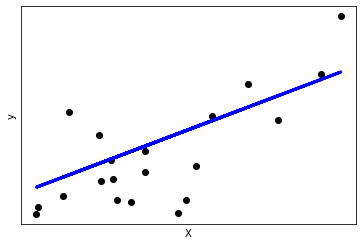

In [ ]:
# plot outputs
plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_test_pred, color='blue', linewidth=3)

plt.xlabel('X')
plt.ylabel('y')

plt.xticks(())
plt.yticks(())

plt.show()

### <font color=blue>[Lab #2-2]</font> Linear regression without sklearn (20 points)
1. Complete the following class definition.  
2. You can write your code only within the marked with comments.

**[hint]** You can use `numpy.linalg.inv` for inverse and `np.matmul` for matrix multiplication.
$$
\mathbf{X}^\dagger = (\mathbf{X}^\top\mathbf{X})^{-1}\mathbf{X}^\top
\\
\mathbf{w}_{\textrm{lin}}=\mathbf{X}^\dagger y
$$

In [ ]:

from numpy.linalg import inv

class LinearRegression():
    def fit(self, X, y):
        #linear regression
        self.X_psuedo_inv = inv((np.transpose(X) @ X)) @ np.transpose(X)
        self.w = self.X_psuedo_inv @ y

    def predict(self, X):
        return  X @ self.w
    
    def get_weights(self):
        return self.w

Extend $\mathbf{X}$ with $\mathbf{1}_d=(1,1,…,1)∈\mathbb{R}^d$ using `add_one_column` method which we used in Lab 1.
$$
\mathbf{X} = \begin{bmatrix} x_1 \\
x_2 \\
\vdots  \\
x_d \\
\end{bmatrix}
\Rightarrow
\mathbf{X} = \begin{bmatrix}
1 & x_1 \\
1 & x_2 \\
\vdots  & \vdots  \\
1 & x_d \\
\end{bmatrix}
$$

By using X, you should compute optimal weight, `w_lin`.

**[hint]** compute pseudo-inverse of $\mathbf{X}$

In [ ]:
def add_one_column(data):
    # number of data records
    N = len(data) 

    # add column of ones for x_0
    return np.c_[np.ones(N), data] 

In [ ]:
X_train_extended = add_one_column(X_train)
X_test_extended = add_one_column(X_test)
print('X_train_extneded: ', str(X_train_extended.shape))
print('X_test_extneded: ', str(X_test_extended.shape))

X_train_extneded:  (422, 2)
X_test_extneded:  (20, 2)


In [ ]:
# create model
np_lin_regr = LinearRegression()

# train model
np_lin_regr.fit(X_train_extended, y_train)

print('Numpy Parameters: %.4f, %.4f' %
      (np_lin_regr.get_weights()[0], np_lin_regr.get_weights()[1]))

Numpy Parameters: 152.9189, 938.2379


In [ ]:
# inferece with train data
y_train_pred = np_lin_regr.predict(X_train_extended)
print('SK train MSE: %.4f' %
      mean_squared_error(y_train, y_train_pred) )

# inferece with test data
y_test_pred = np_lin_regr.predict(X_test_extended)
print('SK test MSE: %.4f' %
      mean_squared_error(y_test, y_test_pred) )

SK train MSE: 3955.0199
SK test MSE: 2548.0724


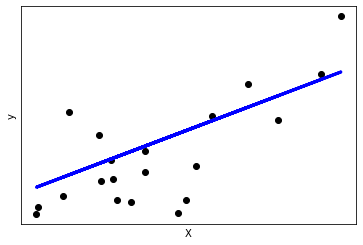

In [ ]:
# plot outputs
plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_test_pred, color='blue', linewidth=3)

plt.xlabel('X')
plt.ylabel('y')

plt.xticks(())
plt.yticks(())

plt.show()

## Load `breast_cancer` data for Logistic Regression

In [ ]:
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()

X = data.data[:, [0, 6]]
y = data.target

# show data size
print('X: ' + str(X.shape))
print('y: ' + str(y.shape))

X: (569, 2)
y: (569,)


Split data into train and test set.

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training/testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

# Show data size
print('X_train: ' + str(X_train.shape))
print('y_train: ' + str(y_train.shape))

print('X_test: ' + str(X_test.shape))
print('y_test: ' + str(y_test.shape))

X_train: (381, 2)
y_train: (381,)
X_test: (188, 2)
y_test: (188,)


### <font color=blue>[Lab #2-3]</font> Logistic regression with sklearn (20 points)
Use **linear_model** from Scikit-Learn.

In [ ]:
# create model
sk_logis_regr = linear_model.LogisticRegression()

# train model
sk_logis_regr.fit(X_train, y_train)

print('SK Parameters: %.4f, %.4f, %.4f' %
      (sk_logis_regr.intercept_,
       sk_logis_regr.coef_[0, 0], sk_logis_regr.coef_[0, 1]))

SK Parameters: 12.9441, -0.8589, -2.7129


In [ ]:
from sklearn.metrics import accuracy_score

# inferece with train data
y_train_pred = sk_logis_regr.predict(X_train)
print('SK train accuracy: %.4f' %
      accuracy_score(y_train, y_train_pred) )

# inferece with test data
y_test_pred = sk_logis_regr.predict(X_test)
print('SK test accuracy: %.4f' %
      accuracy_score(y_test, y_test_pred) )

SK train accuracy: 0.8714
SK test accuracy: 0.9149


### <font color=blue>[Lab #2-4]</font> Logisitic regression with PyTorch (20 points)


Import `PyTorch` packages

In [ ]:
import torch

Convert data into `Tensor`, the inherence data type for `Pytorch`.

In [ ]:
X_train_tensor = torch.FloatTensor(X_train)
y_train_tensor = torch.FloatTensor(y_train)

X_test_tensor = torch.FloatTensor(X_test)
y_test_tensor = torch.FloatTensor(y_test)

Define LogisiticRegression with [`nn.Linear`](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html) and [`sigmoid`](https://pytorch.org/docs/stable/generated/torch.sigmoid.html?highlight=sigmoid#torch.sigmoid).

In [ ]:
from torch import sigmoid

class LogisticRegression(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = torch.nn.Linear(2, 1)
    
    def forward(self,x):
        y_pred = sigmoid(self.linear(x))
        return y_pred

In [ ]:
# set hyper-parameter
NUM_EPOCH = 20000
LEARNING_RATE = 0.1

Construct your learning precedure

1.   Create model with your own model class `LogisticRegression`
2.   Define error term with Binary Cross Entropy [[ref](https://pytorch.org/docs/stable/generated/torch.nn.BCELoss.html)]
3.   Define optimizer with Stochastic Gradient Descent [[ref](https://pytorch.org/docs/stable/generated/torch.optim.SGD.html?highlight=sgd#torch.optim.SGD)]



In [ ]:
# create model
torch_logis_regr = LogisticRegression()

# define error term
criterion = torch.nn.BCELoss()

# define optimizer technique 
optimizer = torch.optim.SGD(torch_logis_regr.parameters(), lr=LEARNING_RATE)

In [ ]:
for epoch in range(NUM_EPOCH):
    # inference
    prob = torch_logis_regr(X_train_tensor)

    # compute loss
    loss = criterion(prob.squeeze(), y_train_tensor)
   
    # remove previous gradient
    optimizer.zero_grad()
    
    # compute gradient
    loss.backward()

    # run optimizer
    optimizer.step()

    if not (epoch % 500):
      print('epoch [%5d / %5d] %.4f' %
            (epoch, NUM_EPOCH, loss.item()))

epoch [    0 / 20000] 0.2414
epoch [  500 / 20000] 0.2407
epoch [ 1000 / 20000] 0.2401
epoch [ 1500 / 20000] 0.2396
epoch [ 2000 / 20000] 0.2390
epoch [ 2500 / 20000] 0.2385
epoch [ 3000 / 20000] 0.2379
epoch [ 3500 / 20000] 0.2374
epoch [ 4000 / 20000] 0.2370
epoch [ 4500 / 20000] 0.2365
epoch [ 5000 / 20000] 0.2360
epoch [ 5500 / 20000] 0.2356
epoch [ 6000 / 20000] 0.2352
epoch [ 6500 / 20000] 0.2348
epoch [ 7000 / 20000] 0.2344
epoch [ 7500 / 20000] 0.2340
epoch [ 8000 / 20000] 0.2336
epoch [ 8500 / 20000] 0.2332
epoch [ 9000 / 20000] 0.2329
epoch [ 9500 / 20000] 0.2326
epoch [10000 / 20000] 0.2322
epoch [10500 / 20000] 0.2319
epoch [11000 / 20000] 0.2316
epoch [11500 / 20000] 0.2313
epoch [12000 / 20000] 0.2310
epoch [12500 / 20000] 0.2307
epoch [13000 / 20000] 0.2304
epoch [13500 / 20000] 0.2302
epoch [14000 / 20000] 0.2299
epoch [14500 / 20000] 0.2297
epoch [15000 / 20000] 0.2294
epoch [15500 / 20000] 0.2292
epoch [16000 / 20000] 0.2289
epoch [16500 / 20000] 0.2287
epoch [17000 /

In [ ]:
# inferece with train data
y_train_prob = torch_logis_regr(X_train_tensor)
y_train_pred = y_train_prob > 0.5
print('Troch train accuracy: %.4f' %
      accuracy_score(y_train, y_train_pred) )

# inferece with test data
y_test_prob = torch_logis_regr(X_test_tensor)
y_test_pred = y_test_prob > 0.5
print('Torch train accuracy: %.4f' %
      accuracy_score(y_test, y_test_pred) )

Troch train accuracy: 0.8950
Torch train accuracy: 0.9362
